# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from pprint import pprint

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set measurement
temp = "imperial"

# Define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp}&q="

In [4]:
# Set open lists
city2 = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []
datetime = []

# Set count quantities
counts = 0
sets = 1

# loop for dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        if counts > 49:
            counts = 1
            sets += 1
            city2.append(city)
        else:
            counts += 1
            city2.append(city)
        print(f"Processing Record {counts} of Set {sets} | {city}")
    except:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Processing Record 1 of Set 1 | pavlovsk
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | sakaraha
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | gizo
Processing Record 15 of Set 1 | ucluelet
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | maceio
Processing Record 19 of Set 1 | saint-joseph
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | khatassy
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | pacific grove
Processing Record 25 of Set 1 | castro


Processing Record 41 of Set 4 | umm lajj
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | plonsk
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | port-gentil
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | stara zagora
Processing Record 49 of Set 4 | bilma
Processing Record 50 of Set 4 | los llanos de aridane
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | contamana
Processing Record 4 of Set 5 | antsohihy
Processing Record 5 of Set 5 | sur
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | dzilam gonzalez
Processing Record 8 of Set 5 | salta
Processing Record 9 of Set 5 | general roca
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | rio brilhante
Processing Record 12 of Set 5 | madimba
Processing Record 13 of Set 5 | thompson
Processing Record 14 of Set 5 | carnar

Processing Record 26 of Set 8 | vzmorye
Processing Record 27 of Set 8 | humaita
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | severobaykalsk
Processing Record 30 of Set 8 | kantabanji
Processing Record 31 of Set 8 | gao
Processing Record 32 of Set 8 | khrebtovaya
Processing Record 33 of Set 8 | megion
Processing Record 34 of Set 8 | sirari
Processing Record 35 of Set 8 | takoradi
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | monywa
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | abonnema
Processing Record 40 of Set 8 | srivardhan
Processing Record 41 of Set 8 | maniitsoq
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 8 | samarai
City not found. Skipping...
Processing Record 43 of Set 8 | wuwei
Processing Record 44 of Set 8 | oktyabrskoye
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | powell river
Processing Record 47 of Set 8 | pitimbu
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary
weather={
    "City":city2,
    "Cloudiness":clouds,
    "Country":country,
    "Date":datetime,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":temp_max,
    "Wind Speed":speed
}

In [6]:
# Create dataframe
weather_df=pd.DataFrame(weather)
weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [7]:
# View dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pavlovsk,73,RU,1580712652,91,50.46,40.11,36.37,12.97
1,punta arenas,90,CL,1580712653,81,-53.15,-70.92,50.00,9.17
2,atuona,0,PF,1580712653,76,-9.80,-139.03,81.72,15.46
3,mataura,100,NZ,1580712653,96,-46.19,168.86,60.01,1.99
4,saint-philippe,18,RE,1580712653,79,-21.36,55.77,84.99,27.51


In [8]:
# Output to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

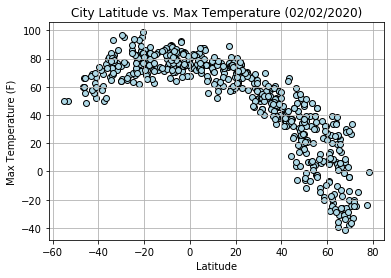

In [9]:
# Set date
today = date.today()
d1 = today.strftime("%d/%m/%Y")

# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/lat_v_temp.png")
plt.show()

### Observation
* Shows that, in northern hemisphere, the farther away the latitude is, it's colder right now because it's winter, and the southern hemisphere is warmer because it's their summer.

#### Latitude vs. Humidity Plot

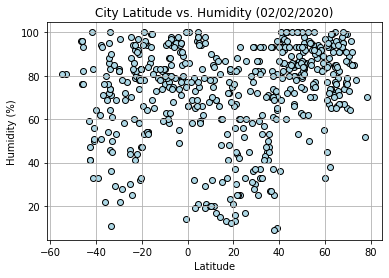

In [10]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/lat_v_humidity.png")
plt.show()

### Observation
* This shows it's a pretty humid day around the world, and it appears that latitude doesn't, necessarily, have anything to do with that. Other factors must be at play here. 

#### Latitude vs. Cloudiness Plot

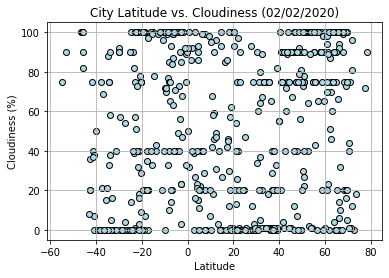

In [11]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/lat_v_clouds.png")
plt.show()

### Observation
* It looks like location doesn't have anything to do with cloudiness. It's sort of a hit and miss depending on where you're at.

#### Latitude vs. Wind Speed Plot

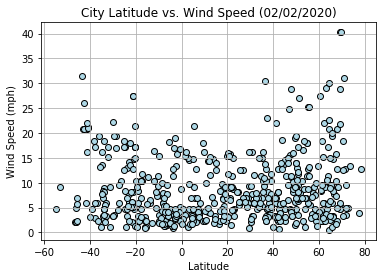

In [12]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/lat_v_speed.png")
plt.show()

### Observation
* It looks like location doesn't have much to do with wind speed either. There are some windy spots, but it doesn't look terrible.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Lat"] >= 0, :]
south_df = weather_df.loc[weather_df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8724303647622651


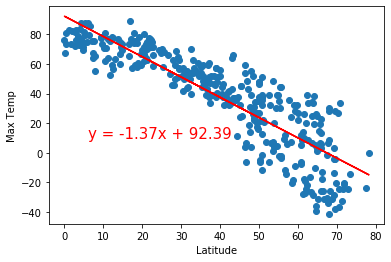

In [15]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 87% of the observations of maximum temperature in the northern hemisphere can be explained by the latitude. It's definitely getting colder the farther north you go.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4754912851297029


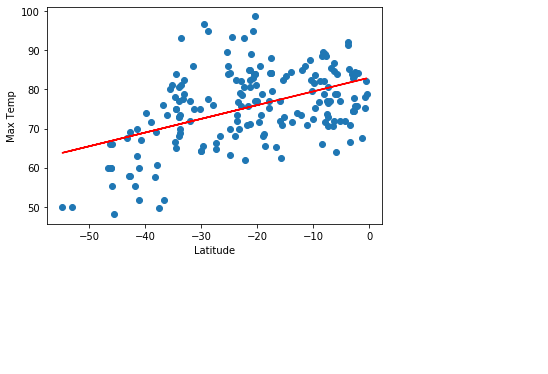

In [23]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 47% of the observations of maximum temperature in the southern hemisphere can be explained by the latitude. I expected this to look a bit different, and expected that the r-squared value would be higher. It makes me curious to know if the r-squared values switch when the northern hemisphere is at its summer peak and the souther hemisphere is deep into winter.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37895546794160806


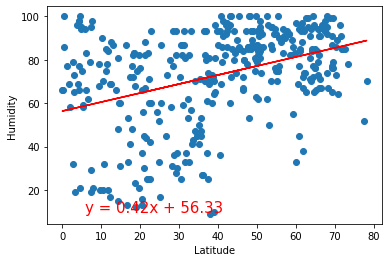

In [17]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 37% of the observations of humidity in the northern hemisphere can be explained by the latitude. That is a small relationship. Humidity is, apparently, influenced by other factors. It is interesting to note that above the 40* latitude line, there seems to be a concentration of locations with higher humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2484787470179758


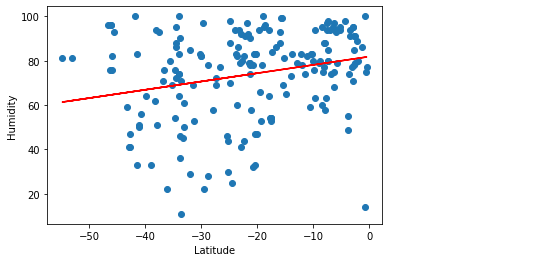

In [18]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 24% of the observations of humidity in the southern hemisphere can be explained by the latitude. Very small relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2865672507153489


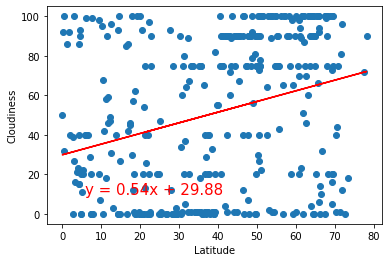

In [19]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 28% of the observations of cloudiness in the northern hemisphere can be explained by latitude. Such a small relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28448803696720504


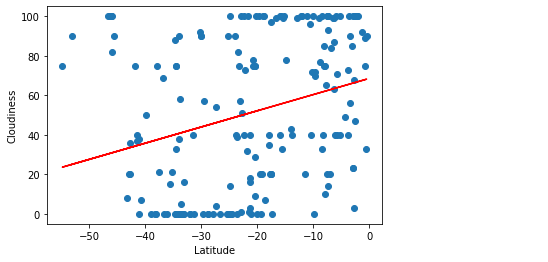

In [20]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 28% of the observations of cloudiness in the southern hemisphere can be explained by latitude. Such a small relationship, but interesting to note it's the same r-squared value as the northern hemisphere, so the relationship is uniformly not related globally. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21027347178680256


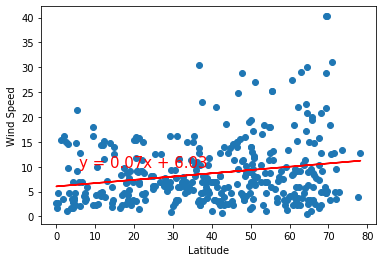

In [21]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 21% of the observations of wind speed in the northern hemisphere can be explained by latitude. Very little relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24353318642144536


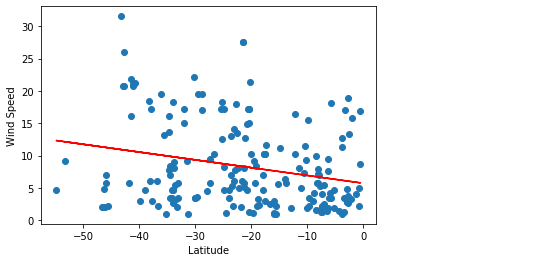

In [22]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

### Observation
* 24% of the observations of wind speed in the southern hemisphere can be explained by latitude. Very little relationship.